# Hidden Markov Models



S - словарь наблюдаемых переменных

H - словарь скрытых переменных

A - матрица перехода

E - матрица эмиссионных вероятностей

p - начальные вероятности

D - последовательность наблюдаемых переменных

In [12]:
S = {'A': 0, 'T': 1, 'C': 2, 'G': 3}
A = [[0.9, 0.1],[0.1, 0.9]] # 2x2
E = [[0.3, 0.3, 0.2, 0.2],[0.2, 0.2, 0.3, 0.3]] # 2x4
p = [0.5, 0.5]
D = ['A', 'C', 'G', 'T', 'A', 'T', 'G', 'C', 'C', 'A', 'A', 'A', 'T', 'T', 'T', 'A','A', 'T', 'T', 'A','A']
len(D)

21

## Viterbi
v_k(i)- вероятность того, что наиболее вероятный путь проходит через состояние k в наблюдени i
(берется максимум вероятности)

In [6]:
def Viterbi(A, E, p, D):
    V = [[0]*len(p) for i in range(len(D))] # Массив для хранения наиболее вероятных путей
    T = [0]*len(D) # Массив для хранения направлений перехода
    for s in range(len(p)):
        V[0][s] = p[s]*E[s][S[D[0]]]
    max_start = max(V[0])
    for s in range(len(p)):
        if V[0][s] == max_start:
            T[0] = s
            break
        
    for n in range(1, len(D)):
        for t in range(len(p)):
            V[n][t] = max( V[n-1][s]*A[s][t]*E[t][S[D[n]]] for s in range(len(p)) )
            for s in range(len(p)):
                #T[n][t]=argmax_s (V[n − 1, s] ∗ A[s, t])
                if V[n-1][s]*A[s][t]*E[t][S[D[n]]] == V[n][t]:
                    T[n] = s
                    break
                    
    #S = argmax s (V [N, s])
    return T#, Ss


In [13]:
Viterbi(A, E, p, D)
len(Viterbi(A, E, p, D))

21

### E.coli K-12
[link ko FastA](https://www.ncbi.nlm.nih.gov/nuccore/NC_000913.3?report=fasta)

In [14]:
from Bio import SeqIO

for seq_record in SeqIO.parse("E.coli K-12.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
    D = seq_record.seq[:1000]

E.
Seq('AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAG...GTA', SingleLetterAlphabet())
4639211


In [15]:
print(D)


AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGATT

In [16]:
Viterbi(A, E, p, D)

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


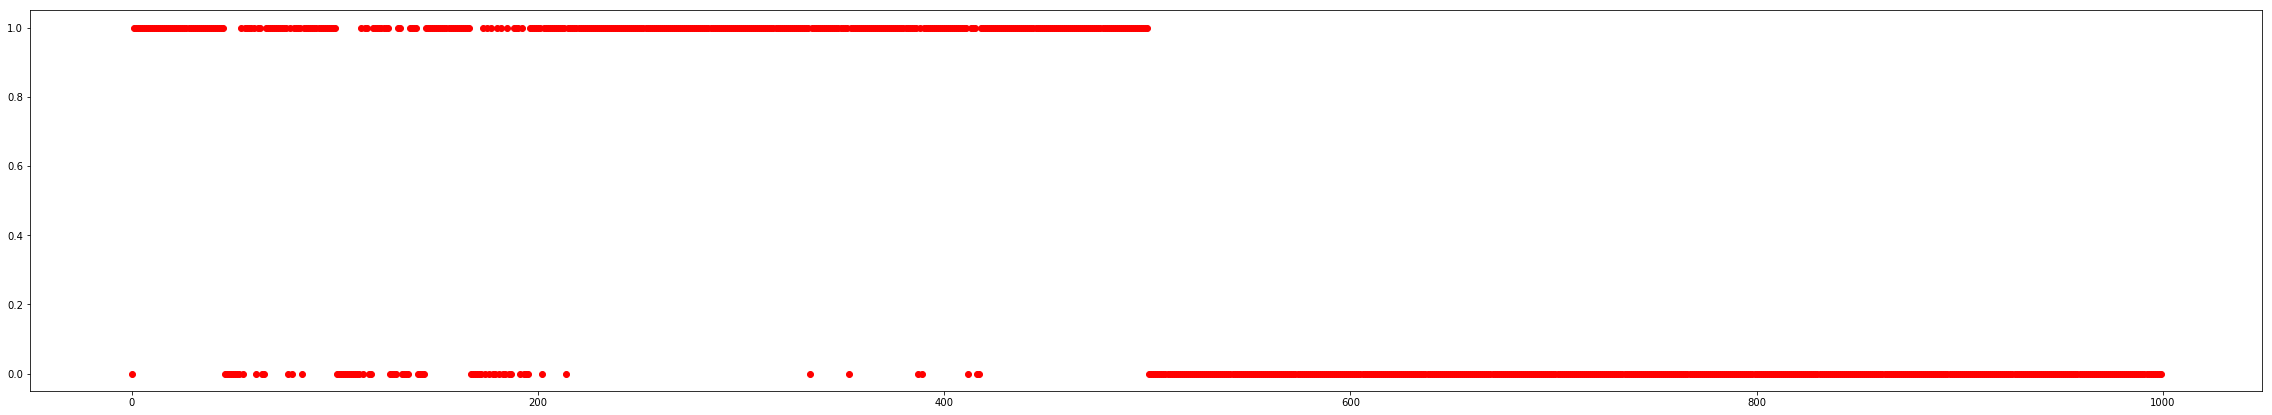

In [52]:
import matplotlib
%matplotlib inline
#%pylab inline

from IPython.core.pylabtools import figsize
figsize(40, 7)

import matplotlib.pyplot as plt
plt.plot(range(1000), Viterbi(A, E, p, D), 'ro')
#matplotlib.rcParams['figure.figsize'] = [120, 100]
#plt.rcParams["figure.figsize"] = [120, 100]
#plt.axis([0, 1000, 0, 1])
plt.show()

## Forward
F_k(i)- вероятность наблюдаемого пути проходит через состояние k в наблюдении i
(берется сумма вероятностей)

In [20]:
def Forward(A, E, p, D, end_state):
    F = [[0]*len(p) for i in range(len(D))] # Массив для хранения наиболее вероятных путей
    P = [0]*len(D) # Массив для хранения суммарных вероятностей
    for s in range(len(p)):
        F[0][s] = p[s]*E[s][S[D[0]]]
    #P[0] = sum(F[0][s] for s in range(len(p)))
        
    for n in range(1, len(D)):
        for t in range(len(p)):
            F[n][t] = sum( F[n-1][s]*A[s][t] for s in range(len(p)) )
            F[n][t] *= E[t][S[D[n]]]                            
        #P[n] = sum (F[n][t] for t in range(len(p)))
        
    p_fwd = sum( F[len(D)-1][t] * A[t][end_state] for t in range(len(p)) )    
    return F, p_fwd

In [21]:
F, p_fwd = Forward(A, E, p, D, 1)
print(p_fwd)

0.0


In [24]:
max_t = [0]*len(D)
for f in range(len(D)):
    max_F = max(F[f])
    for t in range(len(p)):
        if F[f][t] == max_F:
            print(t)
            max_t[f]=t
            break

0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
1
0
1
0
1
0
0
0
0
1
1
0
0
0
0
1
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
1
1
1
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
1
1
1
1
1
1
0
0
0
0
1
0
1
1
1
1
1
1
0
1
0
1
1
1
0
0
0
0
1
0
1
0
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
1
1
1
0
0
0
0
0
0
1
0
0
0
1
1
1
1
1
1
0
0
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
1
0
1
0
1
1
1
1
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
1
1
1
1
0
0
1
1
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
0
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0


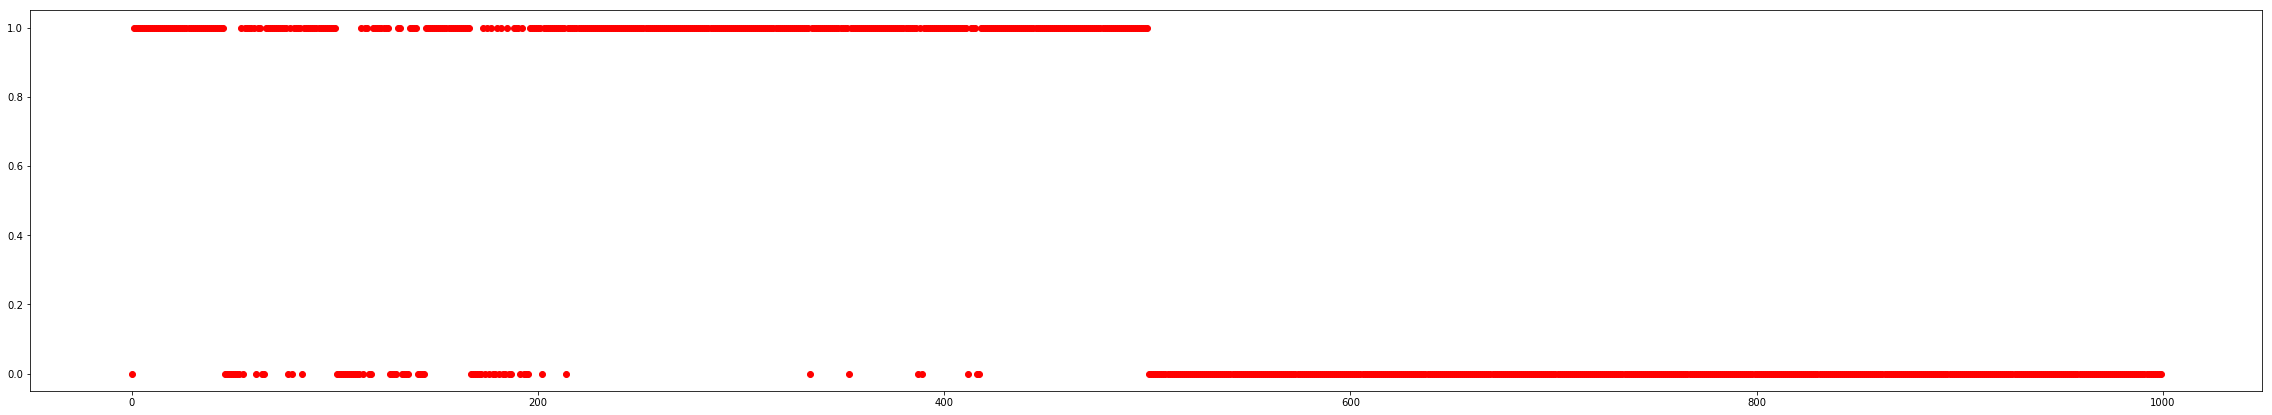

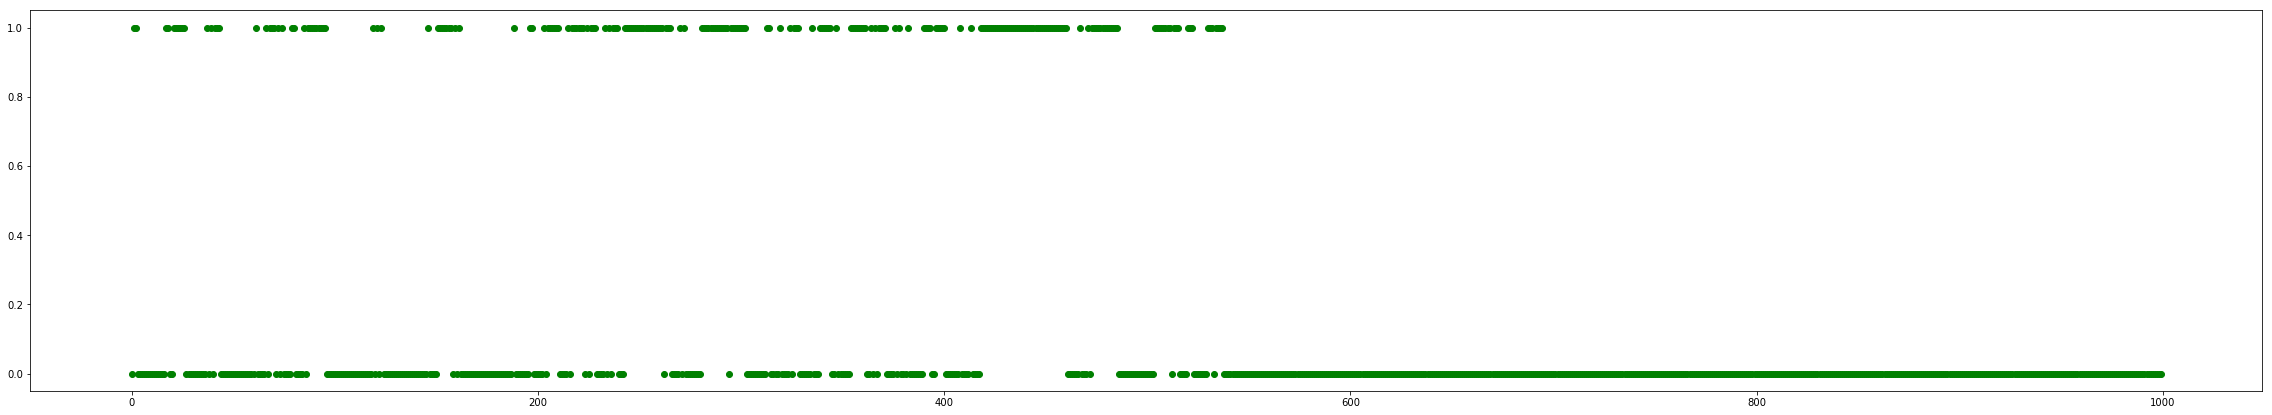

In [55]:
import matplotlib
%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(40, 7)

import matplotlib.pyplot as plt
plt.plot(range(1000), Viterbi(A, E, p, D), 'ro')
#%pylab inline
#pylab.rcParams['figure.figsize'] = (30, 20)
#plt.axis([0, 6, 0, 20])
plt.show()
plt.plot(range(1000), max_t, 'go')
#%pylab inline
#pylab.rcParams['figure.figsize'] = (30, 20)
#plt.axis([0, 6, 0, 20])
plt.show()

## Backward
F_k(i)- вероятность наблюдаемого пути проходит через состояние k в наблюдении i
(берется сумма вероятностей)

In [49]:
def Backward(A, E, p, D, end_state):
    B = [[0]*len(p) for i in range(len(D))] # Массив для хранения наиболее вероятных путей
    P = [0]*len(D) # Массив для хранения суммарных вероятностей
    # initialistatiomm
    for s in range(len(p)):
        B[len(D)-1][s] = A[s][end_state]
        
    for n in range(len(D)-2, -1, -1):
        for t in range(len(p)):
            B[n][t] = sum( B[n+1][s]*A[t][s]*E[t][S[D[n+1]]] for s in range(len(p)) )

    p_bkw = sum( p[t] * E[t][S[D[0]]] * B[0][t] for t in range(len(p)) )
    return B, p_bkw

In [50]:
B, p_bkw = Backward(A, E, p, D, 1)
print(p_bkw)

0.0


In [51]:
for f in range(len(D)):
    max_B = max(B[f])
    for t in range(len(p)):
        if B[f][t] == max_F:
            print(t)
            break

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1


In [52]:
# merging the two parts
posterior = []
for i in range(len(D)):
    posterior.append({t: F[i][t]*B[i][t]/p_fwd for t in range(len(p))})

assert p_fwd == p_bkw

ZeroDivisionError: float division by zero